In [12]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [13]:
df = pd.read_json("results/multivariate/mae.json")

In [14]:
datasets = df.columns.tolist()
contexts = df.index.tolist()
TARGET_LEN=720
new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [15]:
df

,exchange_rate,etth2,etth1,ettm1,ettm2,weather
timemixer_96,0.735106,0.411449,0.659124,0.532313,0.336630,0.355366
vaformer_96,0.812242,0.455408,0.638914,0.520208,0.365465,0.405528
itransformer_96,0.700655,0.399152,0.624131,0.529188,0.336344,0.351067
crossformer_96,0.908365,NaN,NaN,NaN,NaN,NaN
vaformer2_96,0.812242,0.455408,0.638914,0.520208,0.365465,0.405528
moment_512,0.815535,0.439663,0.614161,0.613863,0.354631,0.338015
samformer_512,0.842064,0.447322,0.703185,0.610022,0.336157,0.374093
patchtst_336,0.711348,0.400079,0.629899,0.505997,0.321267,0.341355
crossformer_168,NaN,0.519619,0.672253,NaN,NaN,0.393858
crossformer_288,NaN,NaN,NaN,0.522935,0.427844,NaN


In [16]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [17]:
merged_df

,exchange_rate,etth2,etth1,ettm1,ettm2,weather
model,,,,,,
crossformer,0.908365,0.519619,0.672253,0.522935,0.427844,0.393858
itransformer,0.700655,0.399152,0.624131,0.529188,0.336344,0.351067
moment,0.815535,0.439663,0.614161,0.613863,0.354631,0.338015
patchtst,0.711348,0.400079,0.629899,0.505997,0.321267,0.341355
samformer,0.842064,0.447322,0.703185,0.610022,0.336157,0.374093
timemixer,0.735106,0.411449,0.659124,0.532313,0.336630,0.355366
vaformer,0.812242,0.455408,0.638914,0.520208,0.365465,0.405528
vaformer2,0.812242,0.455408,0.638914,0.520208,0.365465,0.405528


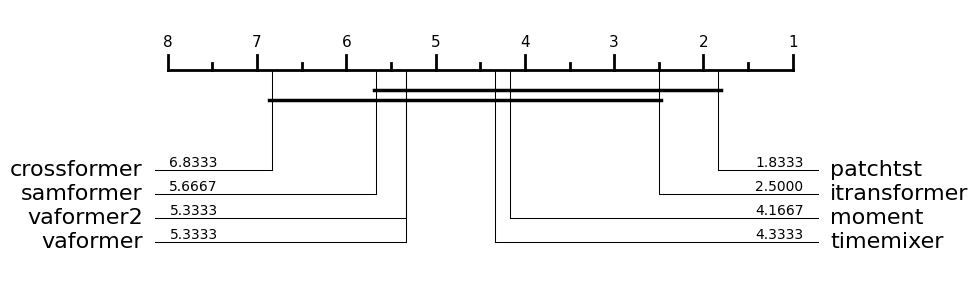

In [18]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  